In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path1 ="\\Users\\eggfr\\Flatiron\\Flatiron_phase4_project\\Gun-Image-Classification\\HC Folder\\data\\GunViolenceArchiveDataJan2014toJun2022.csv"

Gun Violence Archive (GVA) is a not for profit corporation formed in 2013 to provide free online public access to accurate information about gun-related violence in the United States. GVA will collect and check for accuracy, comprehensive information about gun-related violence in the U.S. and then post and disseminate it online. We have around 448402 gun incidents in American between 2013 to 2022.

In [3]:
gun_data_raw_df = pd.read_csv(file_path1, encoding= 'unicode_escape')
gun_data_raw_df.shape

(448402, 8)

Let's check and see if there is any missing data.

In [4]:
gun_data_raw_df.isna().sum()

Incident ID            0
Incident Date          0
state                  0
City Or County         0
Address            15443
n_killed               0
n_injured              0
Operations        448277
dtype: int64

Address will not be used in this analysis, and there is too many data missing in the operation column. Let's drop those two columns and also rename some of of the columns as well.

In [5]:
gun_data_raw_df.rename(columns={'Incident Date':'Date','state': 'State','n_killed': 'People Killed','n_injured': 'People Injured' }, inplace=True)
gun_data_df = gun_data_raw_df.drop(['Address','Operations','Incident ID'], axis=1)

In [6]:
gun_data_df.head()

,Date,State,City Or County,People Killed,People Injured
0,2014-01-01,Florida,Orlando,1,1
1,2014-01-01,Ohio,Cincinnati,1,0
2,2014-01-01,California,Glendale,0,1
3,2014-01-01,Texas,Hebbronville,0,1
4,2014-01-01,New York,Rochester,1,1


Californa, Texas, Florida and Illionis are the top 4 states with the most people killed with gun incidents.

Text(0.5, 0, 'Number of People')

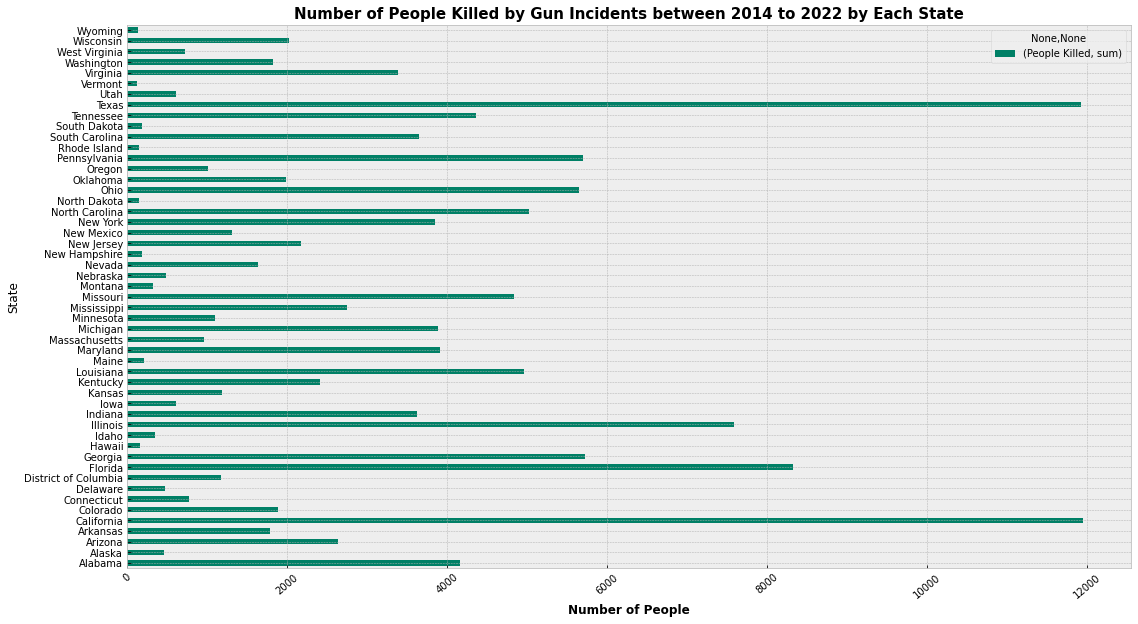

In [7]:
# plot number of people Killed by gun incidents between 2014 to 2022 by each state
plt.style.use('bmh')
order_df = gun_data_df.groupby('State').agg({'People Killed':['sum']}).plot.barh(figsize=(18,10), colormap='summer')
plt.title('Number of People Killed by Gun Incidents between 2014 to 2022 by Each State', weight = "bold", fontsize = 15)
plt.xticks(rotation=40)
plt.xlabel('Number of People', weight = "bold", fontsize = 12)


Californa, Texas, Florida and Illionis are the top 4 states with the most people killed with gun incidents. Let's investigate this a little bit further with popoulation density and income.

#  Death and injury by state

In [8]:
gun_data_df.Date = pd.DatetimeIndex(gun_data_df.Date)
state_df = gun_data_df.set_index("Date").groupby([pd.Grouper(freq="Y"), "State"]).sum().reset_index()
state_df

,Date,State,People Killed,People Injured
0,2014-12-31,Alabama,314,560
1,2014-12-31,Alaska,29,48
2,2014-12-31,Arizona,219,215
3,2014-12-31,Arkansas,165,222
4,2014-12-31,California,1303,1565
...,...,...,...,...
454,2022-12-31,Virginia,248,527
455,2022-12-31,Washington,149,247
456,2022-12-31,West Virginia,37,54
457,2022-12-31,Wisconsin,171,433


Let investigate the population data in 2018 https://www.kaggle.com/datasets/lucasvictor/us-state-populations-2018 . Also, poverty data data and annual income data for each state are gathered from this obesity study. https://www.kaggle.com/datasets/annedunn/obesity-and-gdp-rates-from-50-states-in-20142017 

In [9]:
file_path2 ="\\Users\\eggfr\\Flatiron\\Flatiron_phase4_project\\Gun-Image-Classification\\HC Folder\\data\\2019_Census_US_Population_Data.csv"

In [10]:
file_path3 = "\\Users\\eggfr\\Flatiron\\Flatiron_phase4_project\\Gun-Image-Classification\\HC Folder\\data\\2017GDP_Data.csv"

Population data for each state for 2018, and the first 5 row is shown.

In [11]:
population2018_raw_df = pd.read_csv(file_path2, encoding= 'unicode_escape')
population2018_raw_df.rename(columns={
'STATE':'State','POPESTIMATE2019':'Population'}, inplace=True)
population2018_df = population2018_raw_df.drop(['lat','long'], axis=1)
population2018_df.head()

,State,Population
0,Alabama,4903185
1,Alaska,731545
2,Arizona,7278717
3,Arkansas,3017804
4,California,39512223


Average Income and poverty rate for each state for 2017, and the first 5 row is shown.

In [12]:
obesity_df = pd.read_csv(file_path3, encoding= 'unicode_escape')
abcd=obesity_df.query('Year == 2017')
gdp_df = abcd[['State','Poverty.Rate*100','Average.Income']]
gdp_df.head()

,State,Poverty.Rate*100,Average.Income
3,Alabama,16.89,26471.72046
7,Alaska,11.11,34438.53759
11,Arizona,14.86,29420.61094
15,Arkansas,16.40,25272.81432
19,California,13.30,35128.22756


People that are killed and injured in 2017 from the GVA dataset.

In [13]:
state_2017_raw_df = state_df[(state_df['Date'] > '2017-12-01') & (state_df['Date'] < '2018-5-31')]
state_2017_raw_df['Total Incident'] = state_2017_raw_df['People Killed']+state_2017_raw_df['People Killed']
state_2017_raw_df.head()

C:\Users\eggfr\AppData\Local\Temp\ipykernel_24540\485564796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_2017_raw_df['Total Incident'] = state_2017_raw_df['People Killed']+state_2017_raw_df['People Killed']


,Date,State,People Killed,People Injured,Total Incident
153,2017-12-31,Alabama,547,859,1094
154,2017-12-31,Alaska,71,68,142
155,2017-12-31,Arizona,289,300,578
156,2017-12-31,Arkansas,215,444,430
157,2017-12-31,California,1427,1951,2854


We will combine all 3 tables into 1 tables, and people killed per population and total incident per population for each state is also calculated.

In [14]:
combine_df = pd.merge(population2018_df,gdp_df, left_on ='State',right_on ='State')


In [15]:
state_2017_df = pd.merge(state_2017_raw_df,combine_df, left_on ='State',right_on ='State')
state_2017_df ['Death Per Capita'] = state_2017_df ['People Killed']/state_2017_df ['Population']
state_2017_df ['Incidents Per Capita'] = state_2017_df ['Total Incident']/state_2017_df ['Population']
state_2017_df['Date'] = pd.DatetimeIndex(state_2017_df['Date']).year
state_2017_df.rename(columns={'Date':'Year'},inplace = True)
state_2017_df.head()


,Year,State,People Killed,People Injured,Total Incident,Population,Poverty.Rate*100,Average.Income,Death Per Capita,Incidents Per Capita
0,2017,Alabama,547,859,1094,4903185,16.89,26471.72046,0.000112,0.000223
1,2017,Alaska,71,68,142,731545,11.11,34438.53759,0.000097,0.000194
2,2017,Arizona,289,300,578,7278717,14.86,29420.61094,0.000040,0.000079
3,2017,Arkansas,215,444,430,3017804,16.40,25272.81432,0.000071,0.000142
4,2017,California,1427,1951,2854,39512223,13.30,35128.22756,0.000036,0.000072


In [21]:
# save the data in csv
state_2017_df.to_csv('table_Kill_Per_capita.csv')

It seems like state with lower average income and higher poverty rate has a higher Death per Capita and total incident per capita.

In [17]:
state_2017_df.sort_values('Death Per Capita', ascending=False).head()


,Year,State,People Killed,People Injured,Total Incident,Population,Poverty.Rate*100,Average.Income,Death Per Capita,Incidents Per Capita
17,2017,Louisiana,557,1188,1114,4648794,19.75,26010.45294,0.000120,0.000240
0,2017,Alabama,547,859,1094,4903185,16.89,26471.72046,0.000112,0.000223
23,2017,Mississippi,327,592,654,2976149,19.77,23124.98023,0.000110,0.000220
24,2017,Missouri,613,925,1226,6137428,13.42,29469.19863,0.000100,0.000200
1,2017,Alaska,71,68,142,731545,11.11,34438.53759,0.000097,0.000194


In [18]:
state_2017_df['Poverty.Rate*100'].mean()

13.0606

In [ ]:
file_path3 = "\\Users\\eggfr\\Flatiron\\Flatiron_phase4_project\\Gun-Image-Classification\\HC Folder\\"

# Time series for people killed and injured between 2014 to 2022

In [19]:
gun_data_time_series_df = gun_data_raw_df.drop(['Address','Operations','Incident ID'], axis=1)
gun_data_time_series_df['Date'] = pd.to_datetime(gun_data_time_series_df['Date'])
gun_data_time_series_df.set_index('Date', inplace=True)
gun_data_time_series_df.rename(columns={'state': 'State','n_killed': 'People Killed','n_injured': 'People Injured' }, inplace=True)
gun_data_time_series_df = gun_data_time_series_df.resample('W').sum()
gun_data_time_series_df 


,People Killed,People Injured
Date,,
2014-01-05,177,352
2014-01-12,198,356
2014-01-19,253,419
2014-01-26,252,365
2014-02-02,241,329
...,...,...
2022-05-22,410,756
2022-05-29,382,796
2022-06-05,450,937


Time Series Plot of people killed, people injurded between 2014-2021. 

There is an upward trend for both for the recent years.

Text(0, 0.5, 'Number of People')

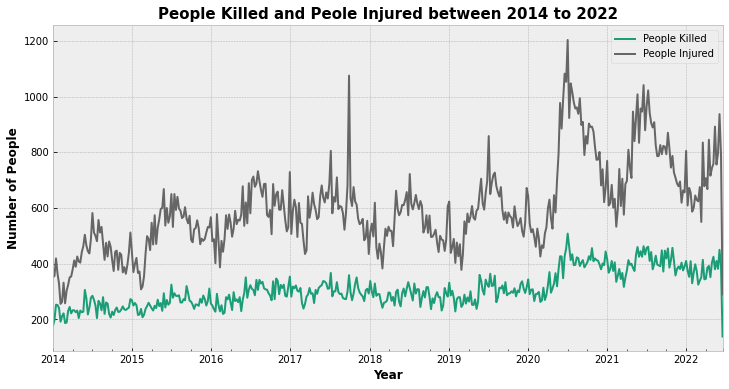

In [20]:
#fig, ax = plt.subplots(figsize=(12, 6))
plt.style.use('bmh')
gun_data_time_series_df.plot(figsize=(12,6), colormap='Dark2')
plt.title('People Killed and Peole Injured between 2014 to 2022', weight = "bold", fontsize = 15)
plt.xlabel('Year', weight = "bold", fontsize = 12)
plt.ylabel('Number of People', weight = "bold", fontsize = 12)